Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Skin Cancer Data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/CNN_assignment_kamil

/content/drive/MyDrive/Colab Notebooks/CNN_assignment_kamil


In [4]:
!unzip '/content/drive/MyDrive/Colab Notebooks/CNN_assignment_kamil/CNN_assignment.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/CNN_assignment_kamil/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic kera

In [5]:
!ls

 CNN_assignment_kamil.ipynb
 CNN_assignment.zip
'Skin cancer ISIC The International Skin Imaging Collaboration'
 Starter_code_Assignment_CNN_Skin_Cancer.ipynb


In [6]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/CNN_assignment_kamil/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/CNN_assignment_kamil/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [7]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [9]:
## Writing train dataset here
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size) 

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
## Writing validation dataset here
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
# List out all the classes of skin cancer and store them in a list. 

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

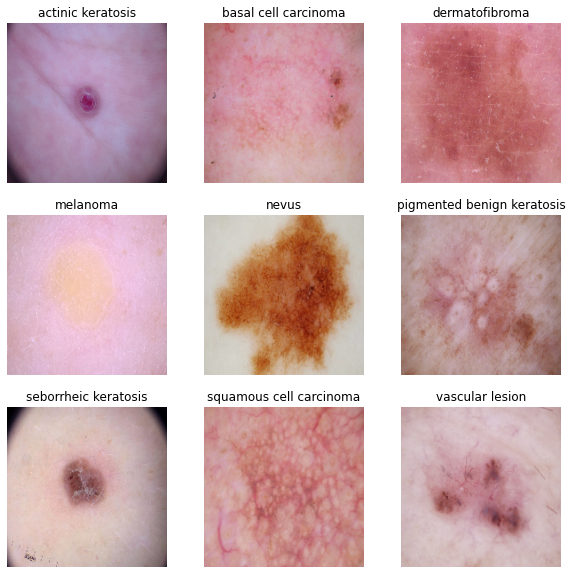

In [12]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[i])
    plt.axis("off")


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [14]:
num_classes = 9
model= Sequential([
                   layers.experimental.preprocessing.Rescaling(scale=1./255,input_shape=(img_height,img_width,3)),
                   layers.Conv2D(8,3,padding='same',activation='relu'),
                   layers.MaxPool2D(),
                   layers.Conv2D(16,3,padding='same',activation='relu'),
                   layers.MaxPool2D(),
                   layers.Conv2D(32,3,padding='same',activation='relu'),
                   layers.MaxPool2D(),
                   layers.Conv2D(64,3,padding='same',activation='relu'),
                   layers.MaxPool2D(),
                   layers.Flatten(),
                   layers.Dense(128,activation='relu'),
                   layers.Dense(num_classes)

])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [15]:
###  choosing an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 32)        4

### Train the model

In [17]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 24s 114ms/step - loss: 2.0464 - accuracy: 0.2115 - val_loss: 2.0037 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 2s 43ms/step - loss: 1.8758 - accuracy: 0.2985 - val_loss: 1.7054 - val_accuracy: 0.4027
Epoch 3/20
56/56 [==============================] - 2s 43ms/step - loss: 1.6852 - accuracy: 0.3839 - val_loss: 1.6592 - val_accuracy: 0.4027
Epoch 4/20
56/56 [==============================] - 2s 43ms/step - loss: 1.5211 - accuracy: 0.4581 - val_loss: 1.4217 - val_accuracy: 0.5213
Epoch 5/20
56/56 [==============================] - 2s 44ms/step - loss: 1.3973 - accuracy: 0.5123 - val_loss: 1.5181 - val_accuracy: 0.4966
Epoch 6/20
56/56 [==============================] - 2s 43ms/step - loss: 1.3502 - accuracy: 0.5290 - val_loss: 1.3500 - val_accuracy: 0.5369
Epoch 7/20
56/56 [==============================] - 3s 52ms/step - loss: 1.2694 - accuracy: 0.5424 - val_loss: 1.3158 - val_accuracy: 0.5436
Epoch 8/20


### Visualizing training results

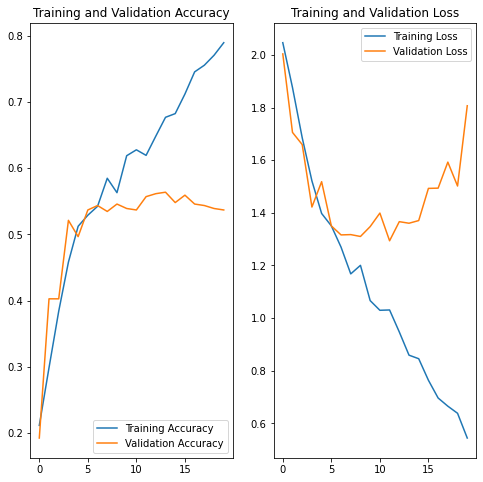

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### It can be clearly seen that at the start, that is with less than 5 epochs the training and validation accuracy as well as loss are in similar range, but as soon as we move ahead, there can be seen big gap in the acccuracy (90% and 56%) as well as loss(0.26 and 2.18), so that means that model is performing well on training data and not on validation/test data, which concludes our model is overfitting

In [19]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.5),
    layers.experimental.preprocessing.RandomZoom(0.3),
  ]
)

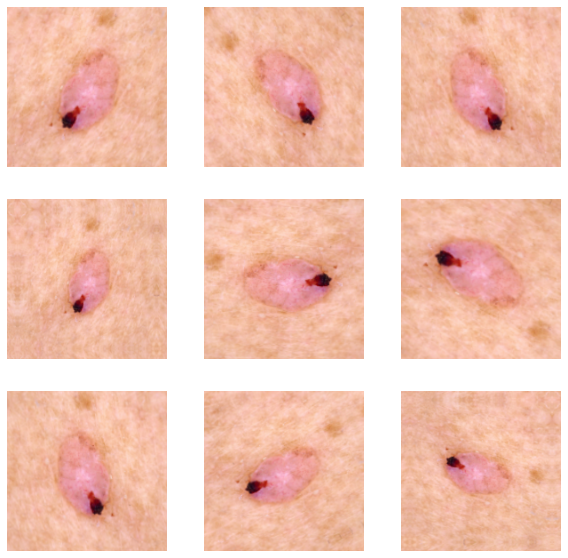

In [20]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images,labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [21]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

num_classes = 9
model= Sequential([
                   data_augmentation,
                   layers.experimental.preprocessing.Rescaling(scale=1./255),
                   layers.Conv2D(8, 3, padding='same', activation='relu'),
                   layers.MaxPooling2D(),
                   layers.Conv2D(16,3,padding='same',activation='relu'),
                   layers.MaxPool2D(),
                   layers.Conv2D(32,3,padding='same',activation='relu'),
                   layers.MaxPool2D(),
                   layers.Conv2D(64,3,padding='same',activation='relu'),
                   layers.MaxPool2D(),
                   layers.Dropout(0.3),
                   layers.Flatten(),
                   layers.Dense(128,activation='relu'),
                   layers.Dense(num_classes)

])

### Compiling the model

In [22]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [23]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 4s 57ms/step - loss: 1.9890 - accuracy: 0.2277 - val_loss: 1.8655 - val_accuracy: 0.3087
Epoch 2/20
56/56 [==============================] - 3s 55ms/step - loss: 1.7637 - accuracy: 0.3644 - val_loss: 1.6449 - val_accuracy: 0.4183
Epoch 3/20
56/56 [==============================] - 3s 55ms/step - loss: 1.6309 - accuracy: 0.4247 - val_loss: 1.5820 - val_accuracy: 0.4698
Epoch 4/20
56/56 [==============================] - 3s 54ms/step - loss: 1.5595 - accuracy: 0.4509 - val_loss: 1.5225 - val_accuracy: 0.4743
Epoch 5/20
56/56 [==============================] - 3s 55ms/step - loss: 1.4591 - accuracy: 0.4888 - val_loss: 1.4366 - val_accuracy: 0.5056
Epoch 6/20
56/56 [==============================] - 3s 55ms/step - loss: 1.4815 - accuracy: 0.4821 - val_loss: 1.4660 - val_accuracy: 0.4877
Epoch 7/20
56/56 [==============================] - 3s 55ms/step - loss: 1.3890 - accuracy: 0.5179 - val_loss: 1.4620 - val_accuracy: 0.4899
Epoch 8/20
56

### Visualizing the results

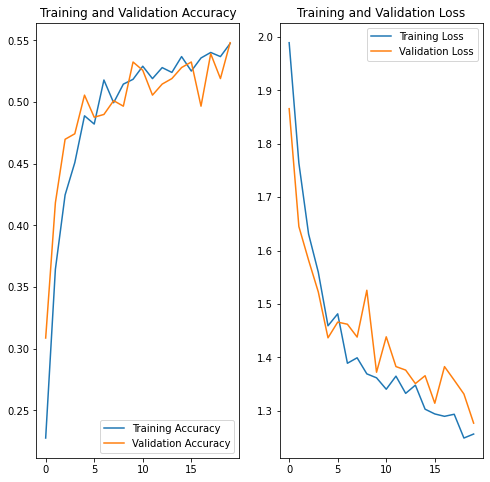

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### It can be easily seen that there is significant reduction in the gap between training and validation accuracy as well as loss, so we can say that we have addressed the overfitting in much better  manner by just using data augmentation technique. But the training accuracy has been dropped to almost 55% which is absolutely not a good thing, it shows now model is uderfitting. This can further be improved, let's do it! 

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [25]:
## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train,'*','*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train,'*','*.jpg'))]
len(path_list)

2239

In [26]:
dataframe_dict_original=dict(zip(path_list,lesion_list))
original_dfx = pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])
original_dfx.head()

Path              Label
0  /content/drive/MyDrive/Colab Notebooks/CNN_ass...  actinic keratosis
1  /content/drive/MyDrive/Colab Notebooks/CNN_ass...  actinic keratosis
2  /content/drive/MyDrive/Colab Notebooks/CNN_ass...  actinic keratosis
3  /content/drive/MyDrive/Colab Notebooks/CNN_ass...  actinic keratosis
4  /content/drive/MyDrive/Colab Notebooks/CNN_ass...  actinic keratosis

In [27]:
original_dfx.Label.value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64


#### - Which class has the least number of samples?
seborrheic keratosis 
#### - Which classes dominate the data in terms proportionate number of samples?
pigmented benign keratosis and melanoma


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [28]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [29]:
path_to_training_dataset= '/content/drive/MyDrive/Colab Notebooks/CNN_assignment_kamil/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.8, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment_kamil/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0270EFF290>: 100%|██████████| 500/500 [00:25<00:00, 19.58 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment_kamil/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F02719E4D50>: 100%|██████████| 500/500 [00:34<00:00, 14.52 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment_kamil/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F0270F62A10>: 100%|██████████| 500/500 [00:28<00:00, 17.47 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment_kamil/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F0270E9D690>: 100%|██████████| 500/500 [01:55<00:00,  4.33 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment_kamil/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7F0270EF3690>: 100%|██████████| 500/500 [01:47<00:00,  4.63 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment_kamil/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0270E98710>: 100%|██████████| 500/500 [00:23<00:00, 21.04 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment_kamil/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F02719DAF10>: 100%|██████████| 500/500 [00:55<00:00,  8.94 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment_kamil/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0270EAA7D0>: 100%|██████████| 500/500 [00:23<00:00, 21.06 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment_kamil/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0271B75810>: 100%|██████████| 500/500 [00:24<00:00, 20.68 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [30]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [31]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[:10]

['/content/drive/MyDrive/Colab Notebooks/CNN_assignment_kamil/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029025.jpg_b4c341e0-8426-49d6-ac32-2acb35af9e88.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN_assignment_kamil/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026729.jpg_74b113e1-d2ec-4fcb-a48b-fef442e2dde7.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN_assignment_kamil/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031609.jpg_96bac4dd-9e81-4311-8389-0cdb4660df44.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN_assignment_kamil/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0032404.jpg_53e443b7-72e2-4841-b231-8aa56dda80a8.jpg',
 '/content/drive/MyDrive/Colab N

In [32]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:10]

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis']

In [33]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [34]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_dfx.append(df2)

In [35]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [36]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [37]:
data_dir_train='/content/drive/MyDrive/Colab Notebooks/CNN_assignment_kamil/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size = (img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [38]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [39]:
## your code goes here
num_classes = 9
model= Sequential([
                   layers.experimental.preprocessing.Rescaling(scale=1./255,input_shape=(img_height,img_width,3)),
                   layers.Conv2D(8, 3, padding='same', activation='relu'),
                   layers.MaxPooling2D(),
                   layers.Dropout(0.1),
                   
                   layers.Conv2D(16,3,padding='same',activation='relu'),
                   layers.MaxPool2D(),
                   layers.Dropout(0.1),

                   layers.Conv2D(32,3,padding='same',activation='relu'),
                   layers.MaxPool2D(),
                   layers.Dropout(0.1),

                   layers.Conv2D(64,3,padding='same',activation='relu'),
                   layers.BatchNormalization(),
                   layers.MaxPool2D(),
                   layers.Dropout(0.3),

                   layers.Flatten(),
                   layers.Dense(128,activation='relu'),
                   layers.Dense(num_classes)

])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [40]:

## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 8)       224       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 90, 90, 8)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 90, 90, 8)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 90, 90, 16)        1168      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 45, 45, 16)       0         
 2D)                                                  

#### **Todo:**  Train your model

In [ ]:

## Your code goes here, use 50 epochs.
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 57s 319ms/step - loss: 2.2521 - accuracy: 0.2257 - val_loss: 2.6380 - val_accuracy: 0.1492
Epoch 2/50
169/169 [==============================] - 39s 224ms/step - loss: 1.6596 - accuracy: 0.3685 - val_loss: 5.4373 - val_accuracy: 0.1344
Epoch 3/50
169/169 [==============================] - 41s 233ms/step - loss: 1.4919 - accuracy: 0.4381 - val_loss: 7.7236 - val_accuracy: 0.2019
Epoch 4/50
169/169 [==============================] - 39s 223ms/step - loss: 1.4052 - accuracy: 0.4594 - val_loss: 11.5286 - val_accuracy: 0.1774
Epoch 5/50
169/169 [==============================] - 39s 224ms/step - loss: 1.3111 - accuracy: 0.4985 - val_loss: 12.8957 - val_accuracy: 0.3318
Epoch 6/50
169/169 [==============================] - 39s 222ms/step - loss: 1.2444 - accuracy: 0.5306 - val_loss: 8.7096 - val_accuracy: 0.2101
Epoch 7/50
169/169 [==============================] - 39s 221ms/step - loss: 1.1956 - accuracy: 0.5517 - val_loss: 6.8111 - val_

#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



The data augmentation does help a lot, the overfitting is reduced and underfitting is also improved significantly (the model is having good accuracy as well as it is generalised decently). It can be clearly seen that, the validation and training accuarcy gap has narrowed down. I have experimented a lot of combinantions in this case study, still this is not the perfect model.  